# Introduction

This notebook explores the performance of various machine learning models for classification. The aim is to evaluate and compare the effectivene of f different algorith s in terms of accuracy, precision, recall, F1-score, and log loss. The workflow include

## Preprocessing Steps:
1. **Data Cleaning**: Any missing or invalid values were handled to ensure data quality.
2. **Feature Selection**: Relevant features were identified and extracted for effective training.
3. **Data Splitting**: The dataset was split into training and testing subsets to evaluate model performance on unseen data.
4. **Normalization/Scaling**: Features were scaled to ensure uniformity and improve the performance of certain algorithms.

## Classification:



1. **Dataset Splitting**: Dividing the dataset into training and testing sets to evaluate model generalization.
2. **Algorithms Tested**:
   - Gradient Boosting Classifier
   - Logistic Regression
   - Support Vector Machine (SVM)
   - Decision Tree Classifier
   - Random Forest Classifier
3. **Evaluation Metrics**:
   - Accuracy Score
   - Jaccard Index
   - Log Loss
   - F1-Score
   - Confusion Matrix

The results are visualized with confusion matrices and detailed classification reports to identify the best-performing model. Based on the results, **Random Forest Classifier** stands out as the most effective algorithm for the given dataset due to its high accuracy and balanced error rates.
prediction errors.


# Load library

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

# Read data from csv file

In [4]:
df =pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.rename(columns ={"caa":"ca",'thalachh':'thalach','restecg':'rest-ecg'}, inplace =True)

# Knowing the data

In [6]:
df.shape

(303, 14)

In [7]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,rest-ecg,thalach,exng,oldpeak,slp,ca,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   rest-ecg  303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Pre-processing

In the **ca column**, we see the value of 4, which is our  **noise** in this column.
Considering that the number of our data is small, instead of removing the noises,<br> we tried to go the noises with fillna to the conventional data for the ca column and used the median

In [9]:
print(df['ca'].value_counts())

df['ca'] =df['ca'].replace(4,np.NAN)
print(df['ca'].value_counts())

df['ca'] =df['ca'].fillna(df['ca'].median())
print(df['ca'].value_counts())

ca
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64
ca
0.0    175
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
ca
0.0    180
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64


If there are duplicate rows in the data, we delete them

In [10]:
df.drop_duplicates()
df.shape


(303, 14)

In this section, we try to **measure the importance** of each data column.<br>
So that important columns for existing algorithms are separated and train data is examined on these columns.<br>
**Tree-based feature selection**<br>

I used **ExtraTreesClassifier** and its methods to check each feature.<br>
I observed the importance of each column and selected the columns thatI thought would give better output to our algorithms.<br>
I must say that at first all the columns were checked for the algorithms and the result was not the removal of some columns.

[0.06712569 0.05440961 0.13227703 0.05959613 0.06294063 0.02159541
 0.03546325 0.07945304 0.09976436 0.07950185 0.06682747 0.13982946
 0.10121607]


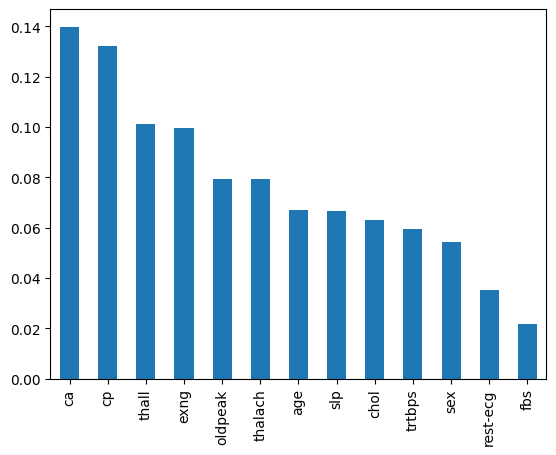

['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'rest-ecg', 'thalach', 'exng', 'oldpeak', 'slp', 'ca', 'thall']


In [11]:
X_shape =df.iloc[:,0:13]
Y_shape =df['output']

from sklearn.ensemble import ExtraTreesClassifier

model =ExtraTreesClassifier()

model.fit(X_shape, Y_shape)
print(model.feature_importances_)
feat_importances =pd.Series(model.feature_importances_, index=X_shape.columns)
#show 13 columns of our fit
feat_importances.nlargest(13).plot.bar()
plt.show()

list1=feat_importances.keys().to_list()
print(list1)


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'rest-ecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

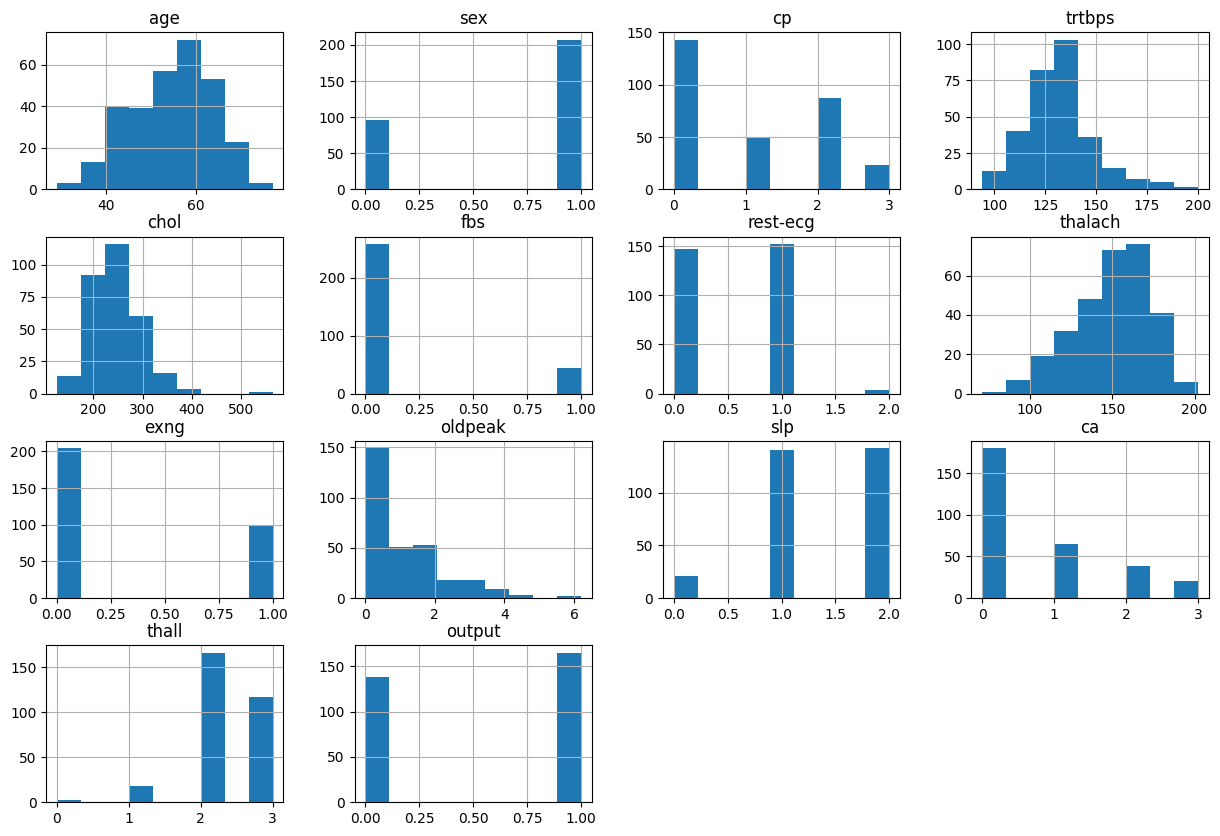

In [12]:
df.hist(figsize=(15,10), bins=9)

# Selection of features

In this part, I tried to remove the columns based on the importance of each column in the above model and my own knowledge, which resulted in 2 **rest-ecg and fbs** columns <br> and one **trtbps** column, which I think and the searches I did. It did not give better results

In [13]:
x=df[['age','sex','cp','chol','thalach','exng','oldpeak','slp','ca','thall']].values
x[:5]

array([[ 63. ,   1. ,   3. , 233. , 150. ,   0. ,   2.3,   0. ,   0. ,
          1. ],
       [ 37. ,   1. ,   2. , 250. , 187. ,   0. ,   3.5,   0. ,   0. ,
          2. ],
       [ 41. ,   0. ,   1. , 204. , 172. ,   0. ,   1.4,   2. ,   0. ,
          2. ],
       [ 56. ,   1. ,   1. , 236. , 178. ,   0. ,   0.8,   2. ,   0. ,
          2. ],
       [ 57. ,   0. ,   0. , 354. , 163. ,   1. ,   0.6,   2. ,   0. ,
          2. ]])

In [14]:
y=df['output'].values
y[:5]

array([1, 1, 1, 1, 1], dtype=int64)

# Data normalization

In [15]:
from sklearn import preprocessing
x= preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[ 0.9521966 ,  0.68100522,  1.97312292, -0.25633371,  0.01544279,
        -0.69663055,  1.08733806, -2.27457861, -0.71113139, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707,  0.07219949,  1.63347147,
        -0.69663055,  2.12257273, -2.27457861, -0.71113139, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, -0.81677269,  0.97751389,
        -0.69663055,  0.31091206,  0.97635214, -0.71113139, -0.51292188],
       [ 0.18017482,  0.68100522,  0.03203122, -0.19835726,  1.23989692,
        -0.69663055, -0.20670527,  0.97635214, -0.71113139, -0.51292188],
       [ 0.29046364, -1.46841752, -0.93851463,  2.08204965,  0.58393935,
         1.43548113, -0.37924438,  0.97635214, -0.71113139, -0.51292188]])

# Training data

In [16]:
from sklearn.model_selection import train_test_split
X_train ,x_test , Y_train , y_test =train_test_split(x , y, test_size=0.2 , random_state=4) 
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (242, 10) (242,)
Test set: (61, 10) (61,)


# Models for find best

Here we review 6 of the most famous classification models for this dataset.<br>
Then we evaluate each of the models and tried to put the best parameters in the models

We will try **KNN** as the first model.<br>
We find the best value of n in this way

In [17]:
from sklearn.neighbors import KNeighborsClassifier


In [18]:
from sklearn import metrics

kn =10
Accuracy =np.zeros((kn-1))

for number in range(1,kn):
    neighbors =KNeighborsClassifier(n_neighbors = number)
    neighbors.fit(X_train,Y_train)
    yhat =neighbors.predict(x_test)
    Accuracy[number-1] =metrics.accuracy_score(y_test, yhat)
    
Accuracy

array([0.7704918 , 0.78688525, 0.83606557, 0.85245902, 0.85245902,
       0.85245902, 0.8852459 , 0.85245902, 0.8852459 ])

Show accuracy in plot 

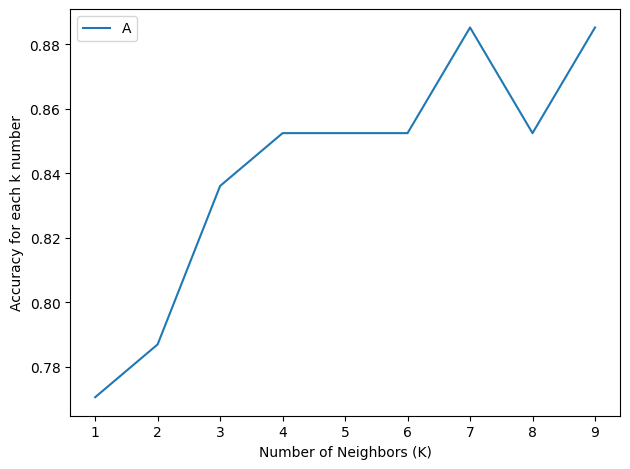

In [19]:
plt.plot(range(1,kn), Accuracy)
plt.legend('Accuracy')
plt.ylabel('Accuracy for each k number')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

We get the most accuracy from the َAccuracy array

In [20]:
max_k_neighbor =Accuracy.argmax()

neigh = KNeighborsClassifier(max_k_neighbor + 1)
neigh.fit(X_train,Y_train)
neigh

KNeighborsClassifier(n_neighbors=7)

In [21]:
yhat = neigh.predict(x_test)
yhat[0:5]

array([1, 0, 1, 1, 1], dtype=int64)

# Evaluation KNN

Now we implemented 4 classification model evaluation methods for each model.
    

In [22]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report

**accuracy_score**

In [23]:
acc_k7=metrics.accuracy_score(y_test, yhat)
acc_k7

0.8852459016393442

**jaccard_score**

In [24]:
jaccard_score(y_test, yhat,pos_label=0)

0.7407407407407407

**log_loss**

In [25]:
log_loss(y_test, yhat)

4.136156946292132

**f1_score**

In [26]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [27]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 5 20]]


Confusion matrix, without normalization
[[34  2]
 [ 5 20]]


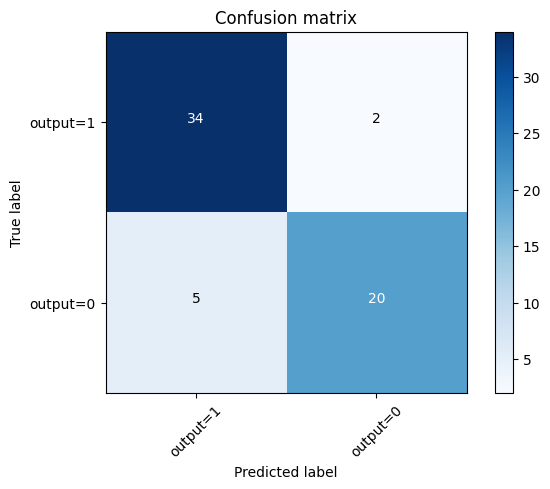

In [28]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

We will try **GradientBoostingClassifier** as the second model.<br>

In [29]:
from sklearn.ensemble import GradientBoostingClassifier


In [30]:
gradientB =GradientBoostingClassifier(n_estimators=100, max_depth =3)
gradientB.fit(X_train, Y_train)


GradientBoostingClassifier()

In [31]:
yhat=gradientB.predict(x_test)
yhat

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

# Evaluation GradientBoostingClassifier

**accuracy_score**

In [32]:
acc_GBC=metrics.accuracy_score(y_test, yhat)
acc_GBC

0.8852459016393442

**jaccard_score**

In [33]:
jaccard_score(y_test, yhat,pos_label=0)

0.7407407407407407

**log_loss**

In [34]:
log_loss(y_test, yhat)

4.136156946292132

**f1_score**

In [35]:
print( classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [36]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 5 20]]


Confusion matrix, without normalization
[[34  2]
 [ 5 20]]


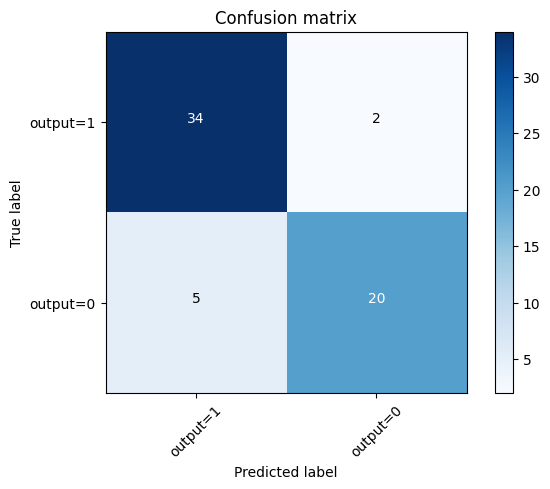

In [37]:
# Compute confusion matrix
cnf_matrix =confusion_matrix(y_test, yhat, labels =[1,0])
np.set_printoptions(precision =2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize =False,  title ='Confusion matrix')

We will try **LogisticRegression** as the third model.

In [38]:
from sklearn.linear_model import LogisticRegression
logisticR =LogisticRegression(C=0.01)
logisticR.fit(X_train,Y_train)
logisticR

LogisticRegression(C=0.01)

In [39]:
yhat =logisticR.predict(x_test)
yhat

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

# Evaluation  LogisticRegression

**accuracy_score**

In [40]:
acc_lr=metrics.accuracy_score(y_test,yhat)
acc_lr

0.8852459016393442

**jaccard_score**

In [41]:
jaccard_score(y_test, yhat,pos_label=0)

0.7307692307692307

**log_loss**

In [42]:
log_loss(y_test, yhat)

4.136156946292132

**f1-score**

In [43]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        25
           1       0.85      0.97      0.91        36

    accuracy                           0.89        61
   macro avg       0.90      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[35  1]
 [ 6 19]]


Confusion matrix, without normalization
[[35  1]
 [ 6 19]]


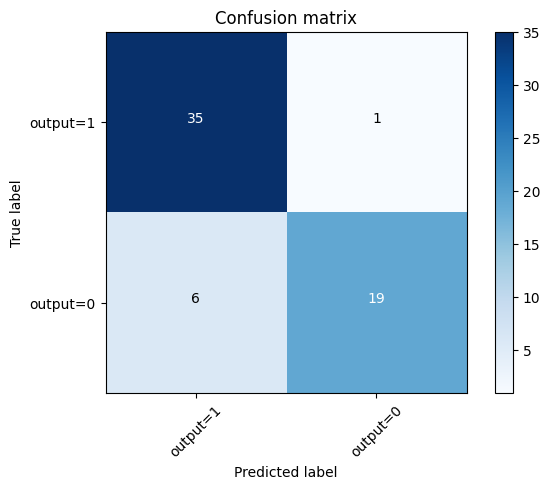

In [45]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

We will try **SVM** as the forth model.

In [46]:
from sklearn import svm
sVm= svm.SVC(kernel='linear')


In [47]:
sVm.fit(X_train, Y_train)

SVC(kernel='linear')

In [48]:
yhat = sVm.predict(x_test)
yhat [0:5]

array([1, 0, 1, 1, 1], dtype=int64)

# Evaluation SVM

**accuracy_score**

In [49]:
acc_sVm=metrics.accuracy_score(y_test,yhat)
acc_sVm

0.8852459016393442

**jaccard_score**

In [50]:
jaccard_score(y_test, yhat,pos_label=0)

0.7407407407407407

**log_loss**

In [51]:
log_loss(y_test, yhat)

4.136156946292132

**f1-score**

In [52]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.91      0.80      0.85        25
           1       0.87      0.94      0.91        36

    accuracy                           0.89        61
   macro avg       0.89      0.87      0.88        61
weighted avg       0.89      0.89      0.88        61



In [53]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 5 20]]


Confusion matrix, without normalization
[[34  2]
 [ 5 20]]


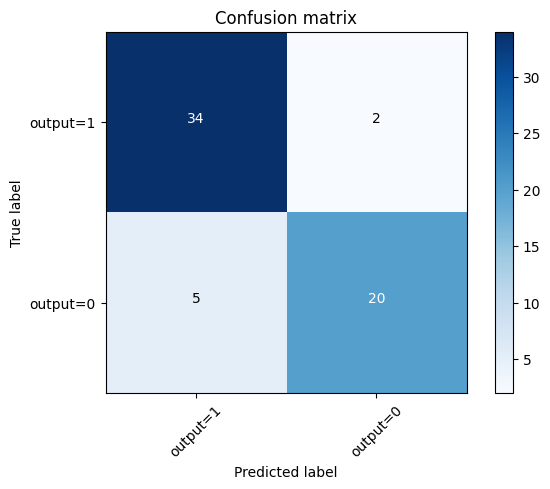

In [54]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

We will try **DecisionTreeClassifier** as the fifth model.

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
deTree =DecisionTreeClassifier(criterion="entropy")
deTree 

DecisionTreeClassifier(criterion='entropy')

In [57]:
deTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
yhat = deTree.predict(x_test)
yhat[:5]

array([0, 0, 1, 1, 1], dtype=int64)

# Evaluation DecisionTreeClassifier

**accuracy_score**

In [59]:
acc_deTree=metrics.accuracy_score(y_test,yhat)
acc_deTree

0.8688524590163934

**jaccard_score**

In [60]:
jaccard_score(y_test, yhat,pos_label=0)

0.7241379310344828

**log_loss**

In [61]:
log_loss(y_test,yhat)

4.727036510048151

**f1-score**

In [62]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84        25
           1       0.89      0.89      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.86      0.86        61
weighted avg       0.87      0.87      0.87        61



In [63]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[32  4]
 [ 4 21]]


Confusion matrix, without normalization
[[32  4]
 [ 4 21]]


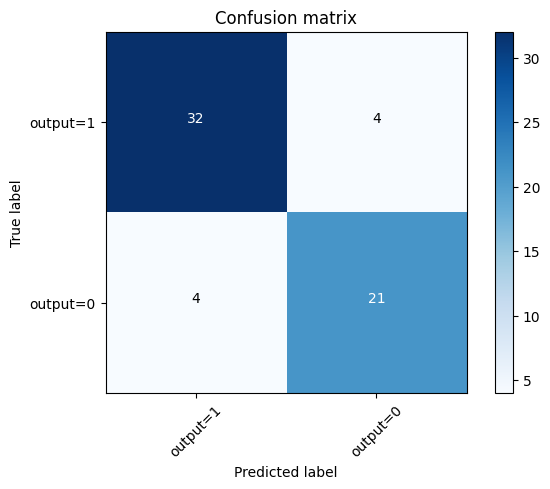

In [64]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

We will try **RandomForestClassifier** as the sixth model.

In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [66]:
forestRandom= RandomForestClassifier(n_estimators=100 ,max_depth=3 , criterion="entropy")

In [67]:
forestRandom.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3)

In [68]:
yhat=forestRandom.predict(x_test)
yhat[:5]

array([1, 0, 1, 1, 1], dtype=int64)

# Evaluation RandomForestClassifier

**accuracy_score**

In [69]:
acc_forest=metrics.accuracy_score(y_test,yhat)
acc_forest

0.9016393442622951

**jaccard_score**

In [70]:
jaccard_score(y_test, yhat,pos_label=0)

0.7777777777777778

**log_loss**

In [71]:
log_loss(y_test,yhat)

3.5452773825361135

**f1-score**

In [72]:
print(classification_report(y_test,yhat))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.94      0.92        36

    accuracy                           0.90        61
   macro avg       0.90      0.89      0.90        61
weighted avg       0.90      0.90      0.90        61



In [73]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[34  2]
 [ 4 21]]


Confusion matrix, without normalization
[[34  2]
 [ 4 21]]


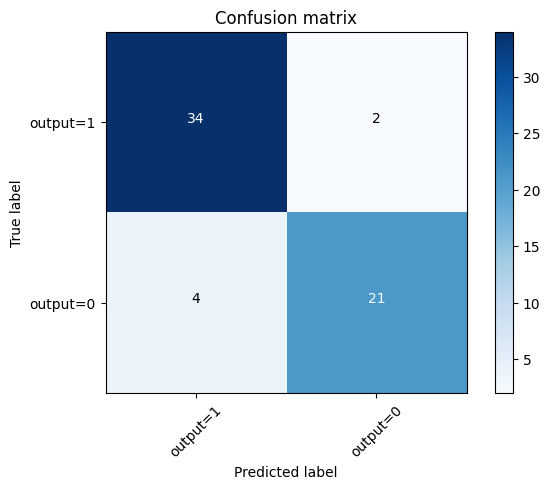

In [74]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['output=1','output=0'],normalize= False,  title='Confusion matrix')

According to the given outputs, it seems that the two algorithms **RandomForestClassifier** and **LogisticRegression** were able to have the lowest FN value for testing data, which is good.<br> Of course, the percentage of this value was also good for other algorithms.<br>
But in general, the **Randomforest algorithm** has given better output to our data and its fp value is also lower,<br> which means a lower error percentage of this algorithm.